In [1]:
import wget
import astropy.io
from astropy.io import fits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
import glob
import os
from glob import glob
from astropy.table import Table
import math

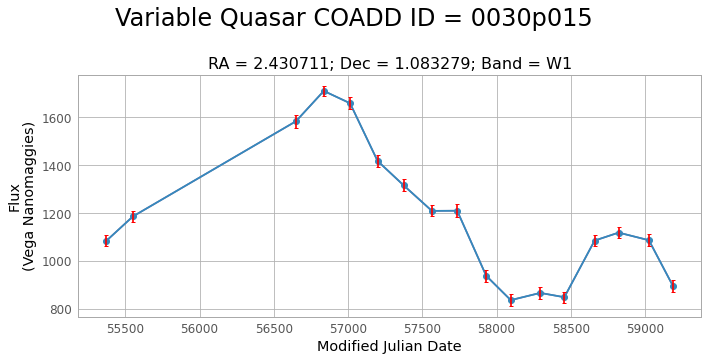

In [33]:
RA = 2.430711
Dec = 1.083279
Flux = []
MJD = []
dFlux = []

file = os.listdir('0030p015')
for files in file:
    catalog = ('0030p015/' + files)
    data = fits.getdata(catalog)
    MJDMEAN = data.MJDMEAN[0]
    MJD.append(MJDMEAN)

    table = Table(data)
    RA_diff = np.abs(table['ra'] - RA)
    Dec_diff = np.abs(table['dec'] - Dec)
    table_diff = (RA_diff + Dec_diff)
    Diff = []

    for item in table_diff:
        Diff.append(item)
    flx = table['flux'][Diff.index(min(Diff))]
    Flux.append(flx)
    dflx = table['dflux'][Diff.index(min(Diff))]
    dFlux.append(dflx)

fig = plt.figure(figsize=(10, 5), tight_layout=True)
plt.plot(MJD, Flux);
plt.scatter(MJD, Flux)
plt.errorbar(MJD, Flux, yerr = dFlux, ecolor = 'red', capsize = 2, barsabove = True)
plt.xlabel('Modified Julian Date');
plt.ylabel('Flux\n(Vega Nanomaggies)');
plt.title('RA = 2.430711; Dec = 1.083279; Band = W1', fontsize = 16)
plt.suptitle('Variable Quasar COADD ID = 0030p015', fontsize = 24, y = 1)
plt.show();

#name = catalog.split('/')[0]
#fig.savefig('/Users/rober/OneDrive/Desktop/WVQ/Plots/' + name);

In [18]:
table

x,y,flux,dx,dy,dflux,qf,rchi2,fracflux,fluxlbs,dfluxlbs,fwhm,spread_model,dspread_model,fluxiso,xiso,yiso,sky,ra,dec,coadd_id,band,unwise_detid,nm,primary,flags_unwise,flags_info,EPOCH,FORWARD,MJDMIN,MJDMAX,MJDMEAN
float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float32,float64,float64,str8,int32,str22,int16,int16,int16,int16,int16,int16,float64,float64,float64
0.3992210980504751,50.74182027857751,120.350204,0.4431555,0.37297967,24.79096,0.7994267,0.8940052,0.9812319,116.20765,25.552986,2.6591551,0.00696218,0.006706653,119.95552,0.025987484504996244,-0.01266788307878808,-1.6415651,3.768250190328341,0.7328955224101851,0030p015,1,0030p015w1o0000000e016,10,0,0,0,16,0,59185.52892735,59188.34067698,59186.934802165
-0.499,193.83498074486852,608.6598,0.098844856,0.10127562,34.822227,0.498312,0.50003225,0.8872144,600.267,35.5971,2.6584747,-0.0009814501,0.002077935,670.2429,-0.20269390762080125,-0.016249169892617057,-1.6553802,3.658959748770158,0.732226346318084,0030p015,1,0030p015w1o0000001e016,10,0,0,0,16,0,59185.52892735,59188.34067698,59186.934802165
-0.3878087177872658,483.83154208405176,746.8422,0.08394878,0.08484677,34.845455,0.5411727,0.36083132,0.7828807,748.60864,35.649048,2.65802,0.00045138597,0.0016751793,760.0563,-0.041946020690028445,-0.03063936739496025,-0.5883898,3.437455896036729,0.7323371032581267,0030p015,1,0030p015w1o0000002e016,9,0,0,0,16,0,59185.52892735,59188.34067698,59186.934802165
-0.499,609.6148508796468,197.27232,0.24952285,0.26064673,28.484106,0.4984067,0.44717842,0.95120615,198.89423,29.1317,2.6609447,-0.00627017,0.0051597822,263.08643,-0.549409417855572,-0.00880817321991329,-0.5513839,3.3413764185321924,0.7322599879268809,0030p015,1,0030p015w1o0000003e016,15,0,0,0,16,0,59185.52892735,59188.34067698,59186.934802165
0.22979538422077894,617.2047003172338,206.89522,0.22683002,0.18474036,20.979689,0.7539243,0.5733406,0.92736405,206.35046,21.59134,2.6566339,0.00060141087,0.0032420738,206.51018,0.012579245968128362,0.004019182391249911,0.07054718,3.335578936623832,0.7328169998460258,0030p015,1,0030p015w1o0000004e016,16,0,0,0,16,0,59185.52892735,59188.34067698,59186.934802165
0.12461104383692145,770.0827751827892,2505.1184,0.020200912,0.016391143,23.609186,0.7225376,2.016712,0.9948273,2513.6611,24.214611,2.654388,7.635355e-05,0.00032516354,2502.1245,0.006331044485560221,0.0031272431956505323,-0.905713,3.2188006799094135,0.7327432338582848,0030p015,1,0030p015w1o0000005e016,17,0,0,0,16,0,59185.52892735,59188.34067698,59186.934802165
-0.0007075592875480652,775.8261572476476,626.16547,0.083023995,0.06825788,24.074867,0.68214417,0.7359427,0.8923599,638.76135,24.670265,2.6546125,0.0030205846,0.0013070304,625.194,0.007138876357513264,-0.005738648688912757,-0.9131358,3.214413464303711,0.7326477101071437,0030p015,1,0030p015w1o0000006e016,14,0,0,0,16,0,59185.52892735,59188.34067698,59186.934802165
-0.4843731475993991,781.2886520382017,248.67838,0.20471676,0.21070865,29.293196,0.5037601,0.52752256,0.9094656,252.24579,29.956112,2.6599114,0.0012745857,0.0041942,249.73802,-0.009521680426406309,0.014818553794867193,-0.9193215,3.210240785496711,0.7322784883036138,0030p015,1,0030p015w1o0000007e016,14,0,0,0,16,0,59185.52892735,59188.34067698,59186.934802165
-0.499,821.8468071399257,798.50507,0.065023035,0.06945256,30.571606,0.49830678,1.3566382,0.99422306,800.2183,31.285887,2.6583552,-0.00095427036,0.0013686795,898.28656,-0.2391165479091698,-0.0026929453632903136,-0.44654787,3.1792594891325474,0.7322684886009682,0030p015,1,0030p015w1o0000008e016,14,0,0,0,16,0,59185.52892735,59188.34067698,59186.934802165
